In [2]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Movie reviews in the IMDB dataset are classified as either positive or negative.

The process of preparing the dataset involves converting each review into a set of word embeddings, where each word is represented by a fixed-size vector.

In [3]:

from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

custom-trained embedding layer with training sample size = 100

In [4]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.sequence import pad_sequences

# Number of words to be used as features
num_features = 10000
# Maximum length of sequences after padding
max_sequence_len = 150

# Load the dataset (only keeping the top `num_features` most frequent words)
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data(num_words=num_features)

# Use only the first 100 training samples for quicker experimentation
train_reviews = train_reviews[:100]
train_labels = train_labels[:100]

# Pad sequences to ensure equal length
train_reviews = pad_sequences(train_reviews, maxlen=max_sequence_len)
test_reviews = pad_sequences(test_reviews, maxlen=max_sequence_len)

# Build the model
review_model = Sequential()
review_model.add(Embedding(input_dim=num_features, output_dim=8, input_length=max_sequence_len))
review_model.add(Flatten())
review_model.add(Dense(1, activation='sigmoid'))

# Compile the model
review_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
review_model.summary()

# Train the model
training_history = review_model.fit(
    train_reviews,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - acc: 0.5594 - loss: 0.6910 - val_acc: 0.4500 - val_loss: 0.6937
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.8711 - loss: 0.6654 - val_acc: 0.4500 - val_loss: 0.6934
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.9156 - loss: 0.6476 - val_acc: 0.4500 - val_loss: 0.6934
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.9516 - loss: 0.6310 - val_acc: 0.4500 - val_loss: 0.6932
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.9617 - loss: 0.6145 - val_acc: 0.4500 - val_loss: 0.6925
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.9656 - loss: 0.5946 - val_acc: 0.4500 - val_loss: 0.6920
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.9758 - loss: 0.5778 - val_acc: 0.4500 - val_loss: 0.6918
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.9937 - loss: 0.5606 - val_acc: 0.4500 - val_loss: 0.6907
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.9937 - loss: 0.5446 - va

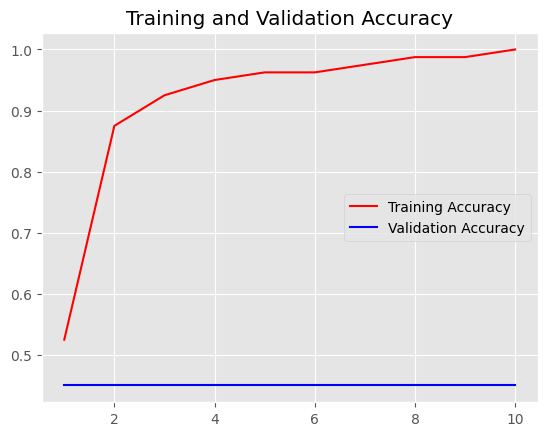

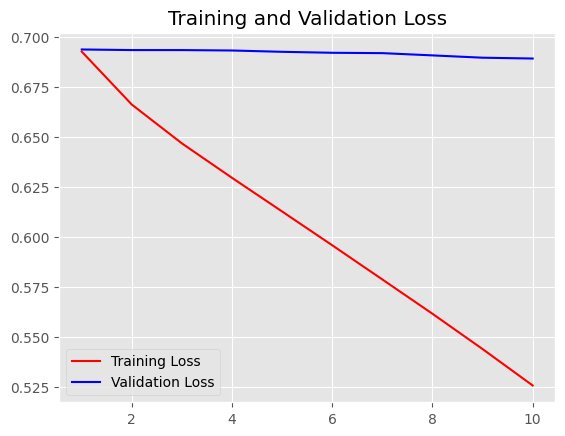

In [5]:
import matplotlib.pyplot as plt

# Training accuracy
train_acc = training_history.history["acc"]
# Validation accuracy
val_acc = training_history.history["val_acc"]
# Training loss
train_loss = training_history.history["loss"]
# Validation loss
val_loss = training_history.history["val_loss"]

epochs_range = range(1, len(train_acc) + 1)

# Plotting accuracy
plt.plot(epochs_range, train_acc, "red", label="Training Accuracy")
plt.plot(epochs_range, val_acc, "blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

# Plotting loss
plt.plot(epochs_range, train_loss, "red", label="Training Loss")
plt.plot(epochs_range, val_loss, "blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()


In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = review_model.evaluate(test_reviews, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4910 - loss: 0.6948
Test loss: 0.6946502327919006
Test accuracy: 0.495959997177124


In [7]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Set feature and sequence length parameters
features = 10000
length = 150

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Pad sequences to uniform length
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Concatenate the text data and labels (for potential use like visualization or full dataset stats)
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Restrict training data to 5000 samples
x_train = x_train[:5000]
y_train = y_train[:5000]


In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Define second model
model2 = Sequential()
model2.add(Embedding(input_dim=10000, output_dim=8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

# Train the model
history2 = model2.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.5195 - loss: 0.6926 - val_acc: 0.5570 - val_loss: 0.6885
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7060 - loss: 0.6690 - val_acc: 0.6720 - val_loss: 0.6628
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8230 - loss: 0.6081 - val_acc: 0.7220 - val_loss: 0.5989
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8606 - loss: 0.5015 - val_acc: 0.7530 - val_loss: 0.5326
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8915 - loss: 0.3942 - val_acc: 0.7970 - val_loss: 0.4697
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9197 - loss: 0.3060 - val_acc: 0.8090 - val_loss: 0.4413
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9473 - loss: 0.2334 - val_acc: 0.8110 - val_loss: 0.4243
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9635 - loss: 0.1867 - val_acc: 0.8140 - val_loss: 0.4095
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

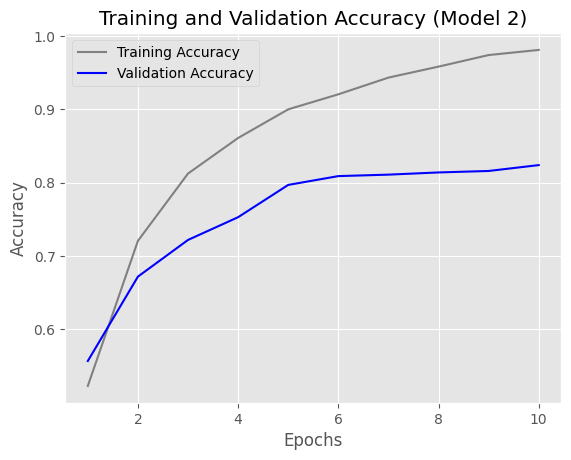

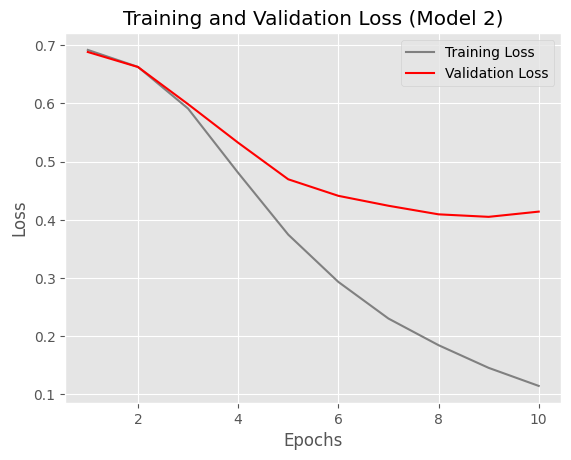

In [9]:
import matplotlib.pyplot as plt

# Extract training and validation metrics from history
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

# Define range of epochs
epochs = range(1, len(accuracy2) + 1)

# Plot training and validation accuracy
plt.plot(epochs, accuracy2, 'grey', label='Training Accuracy')
plt.plot(epochs, validation_accuracy2, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs, train_loss2, 'grey', label='Training Loss')
plt.plot(epochs, validation_loss2, 'red', label='Validation Loss')
plt.title('Training and Validation Loss (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.show()


In [10]:
# Evaluate model2 on the test set
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8274 - loss: 0.3802
Test loss: 0.3808899521827698
Test accuracy: 0.828760027885437


layer of custom-trained embeddings with a training sample of 1000

In [11]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Set number of features and input length
features = 10000
length = 150

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Pad sequences to ensure consistent length
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combine full dataset (optional: for analysis/visualization purposes)
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Restrict to first 1000 training samples
x_train = x_train[:1000]
y_train = y_train[:1000]


In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Define Model 3
model3 = Sequential()
model3.add(Embedding(input_dim=10000, output_dim=8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))

# Compile Model 3
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Display model architecture
model3.summary()

# Train Model 3
history3 = model3.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - acc: 0.4955 - loss: 0.6930 - val_acc: 0.5600 - val_loss: 0.6909
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.7629 - loss: 0.6764 - val_acc: 0.5650 - val_loss: 0.6894
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8999 - loss: 0.6582 - val_acc: 0.5700 - val_loss: 0.6873
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9239 - loss: 0.6393 - val_acc: 0.5800 - val_loss: 0.6849
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9642 - loss: 0.6086 - val_acc: 0.5750 - val_loss: 0.6817
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9620 - loss: 0.5787 - val_acc: 0.6000 - val_loss: 0.6780
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9555 - loss: 0.5443 - val_acc: 0.6100 - val_loss: 0.6738
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9622 - loss: 0.5005 - val_acc: 0.6300 - val_loss: 0.6692
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9720 - loss:

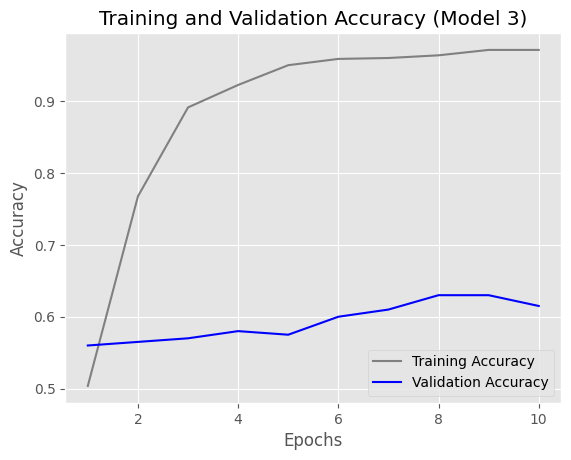

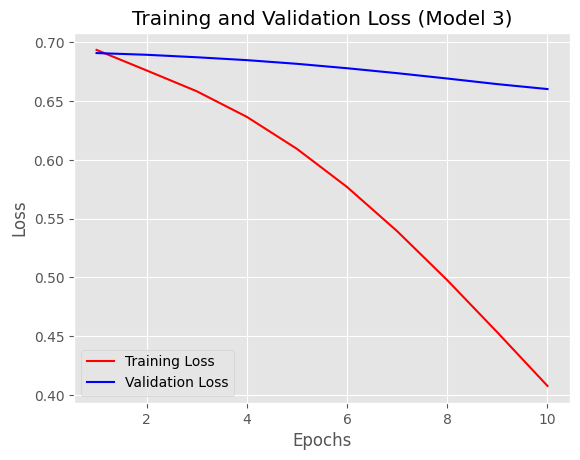

In [13]:
import matplotlib.pyplot as plt

# Extract metrics from history
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

# Create range for x-axis (epochs)
epochs = range(1, len(accuracy3) + 1)

# Plot training and validation accuracy
plt.plot(epochs, accuracy3, "grey", label="Training Accuracy")
plt.plot(epochs, validation_accuracy3, "blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy (Model 3)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs, train_loss3, "red", label="Training Loss")
plt.plot(epochs, validation_loss3, "blue", label="Validation Loss")
plt.title("Training and Validation Loss (Model 3)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [14]:
# Evaluate model3 on the test data
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)

# Print test performance
print("Test Loss (Model 3):", round(test_loss3, 4))
print("Test Accuracy (Model 3):", round(test_accuracy3, 4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5781 - loss: 0.6749
Test Loss (Model 3): 0.6771
Test Accuracy (Model 3): 0.576


layer of custom-trained embeddings with 10000 training samples

In [15]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Set parameters
features = 10000
length = 150

# Load data with top `features` frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combine all text and labels for potential use (e.g., visualization or reshuffling)
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Reduce training set size to 10,000 for current experiment
x_train = x_train[:10000]
y_train = y_train[:10000]


In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Define Model 4
model4 = Sequential()
model4.add(Embedding(input_dim=10000, output_dim=8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))

# Compile Model 4
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Display model architecture
model4.summary()

# Train Model 4
history4 = model4.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5120 - loss: 0.6924 - val_acc: 0.6170 - val_loss: 0.6795
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.7509 - loss: 0.6428 - val_acc: 0.7695 - val_loss: 0.5574
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8244 - loss: 0.4866 - val_acc: 0.8370 - val_loss: 0.4199
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8861 - loss: 0.3447 - val_acc: 0.8500 - val_loss: 0.3635
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9119 - loss: 0.2675 - val_acc: 0.8605 - val_loss: 0.3344
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9351 - loss: 0.2105 - val_acc: 0.8575 - val_loss: 0.3291
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9515 - loss: 0.1671 - val_acc: 0.8620 - val_loss: 0.3238
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9620 - loss: 0.1364 - val_acc: 0.8640 - val_loss: 0.3213
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

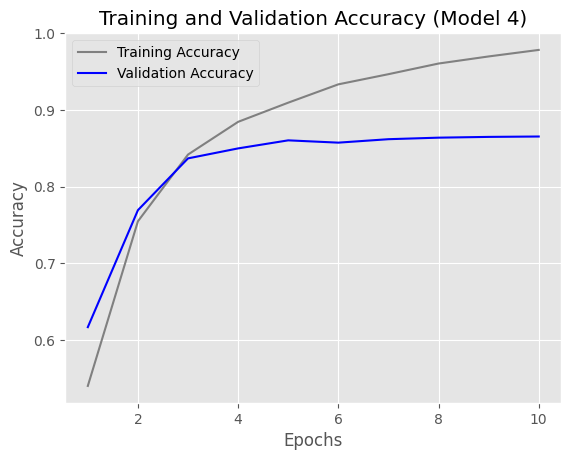

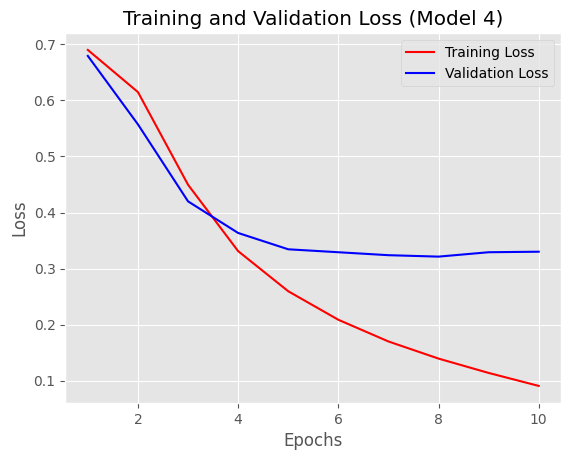

In [17]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

# Define the range of epochs
epochs = range(1, len(accuracy4) + 1)

# Plot training and validation accuracy
plt.figure()
plt.plot(epochs, accuracy4, "grey", label="Training Accuracy")
plt.plot(epochs, validation_accuracy4, "blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy (Model 4)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.figure()
plt.plot(epochs, train_loss4, "red", label="Training Loss")
plt.plot(epochs, validation_loss4, "blue", label="Validation Loss")
plt.title("Training and Validation Loss (Model 4)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [18]:
# Evaluate Model 4 on the test dataset
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)

# Print the results
print("Test Loss (Model 4):", round(test_loss4, 4))
print("Test Accuracy (Model 4):", round(test_accuracy4, 4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8523 - loss: 0.3479
Test Loss (Model 4): 0.3433
Test Accuracy (Model 4): 0.8552


In [19]:
# Download the IMDB sentiment dataset
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Extract the dataset archive
!tar -xf aclImdb_v1.tar.gz

# Remove the 'unsup' folder (unlabeled data not needed for supervised learning)
!rm -r aclImdb/train/unsup


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  47.2M      0  0:00:01  0:00:01 --:--:-- 47.2M


In [20]:
import os
import shutil

# Base directory for IMDB dataset
dataset_path = 'aclImdb'
train_path = os.path.join(dataset_path, 'train')

review_texts = []
review_labels = []

for sentiment in ['neg', 'pos']:
    sentiment_folder = os.path.join(train_path, sentiment)
    for file_name in os.listdir(sentiment_folder):
        if file_name.endswith('.txt'):
            with open(os.path.join(sentiment_folder, file_name), encoding='utf-8') as file:
                review_texts.append(file.read())
            review_labels.append(0 if sentiment == 'neg' else 1)


Utilizing Trained Word Embeds  If there is not enough training data to obtain word embeddings along with the problem you wish to solve, you can use pretrained word embeddings.

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Settings
max_review_length = 150
train_sample_count = 100
val_sample_count = 10000
vocab_size = 10000

# Tokenization
review_tokenizer = Tokenizer(num_words=vocab_size)
review_tokenizer.fit_on_texts(review_texts)
review_sequences = review_tokenizer.texts_to_sequences(review_texts)

# Get word index dictionary
vocab_index = review_tokenizer.word_index
print(f"Found {len(vocab_index)} unique tokens.")

# Pad sequences
padded_reviews = pad_sequences(review_sequences, maxlen=max_review_length)

# Convert labels to NumPy array
review_labels = np.asarray(review_labels)
print("Shape of review tensor:", padded_reviews.shape)
print("Shape of label tensor:", review_labels.shape)

# Shuffle and split the dataset
shuffle_indices = np.arange(padded_reviews.shape[0])
np.random.shuffle(shuffle_indices)

padded_reviews = padded_reviews[shuffle_indices]
review_labels = review_labels[shuffle_indices]

x_train_set = padded_reviews[:train_sample_count]
y_train_set = review_labels[:train_sample_count]
x_val_set = padded_reviews[train_sample_count:train_sample_count + val_sample_count]
y_val_set = review_labels[train_sample_count:train_sample_count + val_sample_count]


Found 88582 unique tokens.
Shape of review tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [22]:
import numpy as np
import requests
from io import BytesIO
import zipfile

# URL to GloVe embeddings
glove_download_url = 'https://nlp.stanford.edu/data/glove.6B.zip'
glove_response = requests.get(glove_download_url)

# Extract zip contents
with zipfile.ZipFile(BytesIO(glove_response.content)) as glove_zip_ref:
    glove_zip_ref.extractall('/content/glove_vectors')

# Load GloVe word embeddings into a dictionary
glove_embeddings = {}
glove_path = '/content/glove_vectors/glove.6B.100d.txt'

with open(glove_path, encoding='utf-8') as file:
    for line in file:
        parts = line.split()
        word_token = parts[0]
        word_vector = np.asarray(parts[1:], dtype='float32')
        glove_embeddings[word_token] = word_vector

print("Total word vectors loaded:", len(glove_embeddings))


Total word vectors loaded: 400000


We trained the 6B version of the GloVe model on a corpus of Wikipedia data and Gigaword 5; it has 6 billion tokens and 400,000 words.

Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [23]:
embedding_dim = 100  # Dimension of GloVe word vectors

# Initialize the embedding matrix with zeros
embedding_weights = np.zeros((vocab_size, embedding_dim))

# Populate the embedding matrix with GloVe vectors
for token, idx in vocab_index.items():
    if idx < vocab_size:
        vector = glove_embeddings.get(token)
        if vector is not None:
            embedding_weights[idx] = vector


In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Build the model using pre-defined hyperparameters
glove_model = Sequential()
glove_model.add(Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          input_length=max_review_length))
glove_model.add(Flatten())
glove_model.add(Dense(32, activation='relu'))
glove_model.add(Dense(1, activation='sigmoid'))

# Display the model architecture
glove_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

# Dimensions derived from the precomputed embedding matrix
embedding_size = embedding_weights.shape[1]
vocab_limit = embedding_weights.shape[0]

# Define a new model using pretrained embeddings
text_model = Sequential()
text_model.add(
    Embedding(
        input_dim=vocab_limit,
        output_dim=embedding_size,
        embeddings_initializer=Constant(embedding_weights),
        input_length=max_review_length,
        trainable=False  # Keeps the GloVe vectors fixed
    )
)

# Display model structure
text_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

# Set embedding parameters from the pretrained matrix
embedding_size = embedding_weights.shape[1]
max_vocab = embedding_weights.shape[0]

# Build the model
glove_text_model = Sequential()
glove_text_model.add(
    Embedding(
        input_dim=max_vocab,
        output_dim=embedding_size,
        embeddings_initializer=Constant(embedding_weights),
        input_length=max_review_length,
        trainable=False
    )
)
glove_text_model.add(GlobalAveragePooling1D())  # Pooling layer
glove_text_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary sentiment

# Compile the model
glove_text_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
training_history = glove_text_model.fit(
    x_train_set, y_train_set,
    epochs=10,
    batch_size=32,
    validation_data=(x_val_set, y_val_set)
)

# Save model weights
glove_text_model.save_weights('glove_sentiment_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - acc: 0.4984 - loss: 0.6984 - val_acc: 0.4918 - val_loss: 0.7017
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - acc: 0.4580 - loss: 0.7004 - val_acc: 0.4922 - val_loss: 0.7015
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - acc: 0.4527 - loss: 0.7003 - val_acc: 0.4778 - val_loss: 0.6988
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - acc: 0.4840 - loss: 0.6927 - val_acc: 0.4601 - val_loss: 0.6970
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - acc: 0.4673 - loss: 0.6954 - val_acc: 0.4669 - val_loss: 0.6972
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - acc: 0.4185 - loss: 0.6981 - val_acc: 0.4778 - val_loss: 0.6978
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 0.4538 - loss: 0.6966 - val_acc: 0.4743 - val_loss: 0.6973
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 0.4930 - loss: 0.6956 - val_acc: 0.4638 - val_loss: 0.6962
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - acc: 0.4677 - loss: 

The Embeddig layer receives pre-trained word embedding.  Setting this to False when calling the Embedding layer guarantees that it cannot be trained.  Setting trainable = True will allow the optimization procedure to alter the word embedding settings.  To keep students from forgetting what they already "know," it is advisable to avoid updating pretrained parts while they are still receiving instruction.

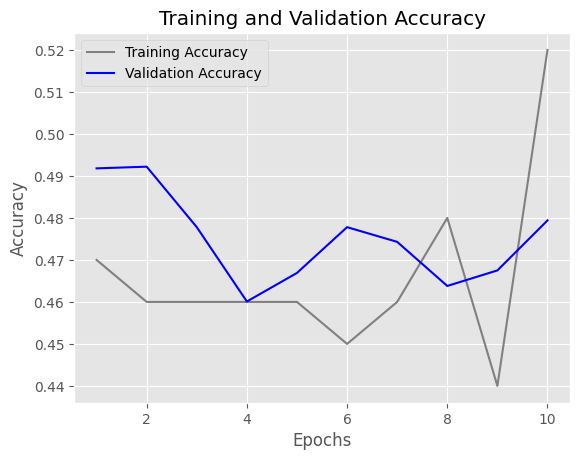

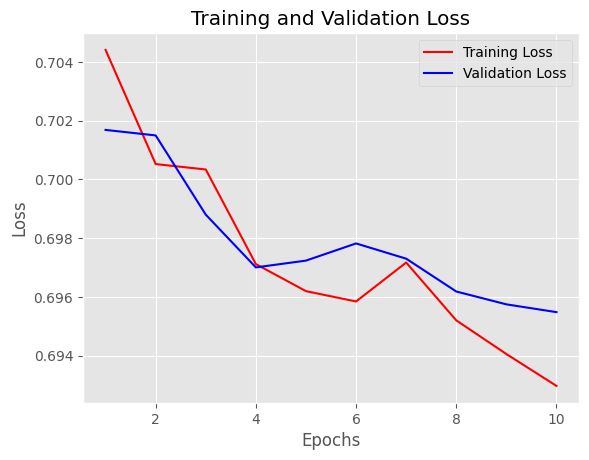

In [30]:
import matplotlib.pyplot as plt

# Extract metrics from training history
train_acc = training_history.history['acc']
val_acc = training_history.history['val_acc']
loss_train = training_history.history['loss']
loss_val = training_history.history['val_loss']

# Epochs for x-axis
epoch_range = range(1, len(train_acc) + 1)

# Plot training vs validation accuracy
plt.plot(epoch_range, train_acc, 'grey', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot training vs validation loss
plt.plot(epoch_range, loss_train, 'red', label='Training Loss')
plt.plot(epoch_range, loss_val, 'blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [31]:
# Evaluate the GloVe-based model on the test dataset
final_loss, final_accuracy = glove_text_model.evaluate(x_test, y_test)

# Display test performance
print("Test Loss:", round(final_loss, 4))
print("Test Accuracy:", round(final_accuracy, 4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5309 - loss: 0.6916
Test Loss: 0.6919
Test Accuracy: 0.5306


pretrained word embedding layer with training sample size = 5000

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Define model with renamed variables
glove_dense_model = Sequential()
glove_dense_model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=max_review_length
    )
)
glove_dense_model.add(Flatten())
glove_dense_model.add(Dense(32, activation='relu'))
glove_dense_model.add(Dense(1, activation='sigmoid'))

# Explicitly build model to load pretrained weights
glove_dense_model.build(input_shape=(None, max_review_length))

# Load pretrained GloVe weights into the embedding layer
glove_dense_model.layers[0].set_weights([embedding_weights])
glove_dense_model.layers[0].trainable = False  # Freeze embedding layer

# Compile the model
glove_dense_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history_dense_glove = glove_dense_model.fit(
    x_train_set, y_train_set,
    epochs=10,
    batch_size=32,
    validation_data=(x_val_set, y_val_set)
)

# Save the trained model weights
glove_dense_model.save_weights('glove_dense_frozen.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 789ms/step - acc: 0.5275 - loss: 4.9679 - val_acc: 0.5092 - val_loss: 0.7330
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - acc: 0.6652 - loss: 0.5955 - val_acc: 0.5081 - val_loss: 0.9506
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 0.7543 - loss: 0.4666 - val_acc: 0.5040 - val_loss: 1.0597
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 0.8951 - loss: 0.2647 - val_acc: 0.5226 - val_loss: 0.7536
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 0.9845 - loss: 0.1294 - val_acc: 0.5286 - val_loss: 0.7622
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - acc: 1.0000 - loss: 0.0544 - val_acc: 0.5116 - val_loss: 0.8927
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 0.0431 - val_acc: 0.5321 - val_loss: 0.7716
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 0.0267 - val_acc: 0.5207 - val_loss: 0.8190
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 

In [34]:
# Evaluate the GloVe-based dense model on the test set
test_loss_dense, test_accuracy_dense = glove_dense_model.evaluate(x_test, y_test)

# Print test performance
print("Test Loss:", round(test_loss_dense, 4))
print("Test Accuracy:", round(test_accuracy_dense, 4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.5002 - loss: 0.8131
Test Loss: 0.8129
Test Accuracy: 0.4982


pretrained word embedding layer with training sample size = 1000

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [36]:
# Force embedding layer to initialize its weights before loading GloVe
glove_dense_model.layers[0].build(input_shape=(None, max_review_length))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - acc: 0.4752 - loss: 2.1777 - val_acc: 0.5041 - val_loss: 0.7249
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - acc: 0.7007 - loss: 0.5535 - val_acc: 0.4962 - val_loss: 1.0150
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - acc: 0.7196 - loss: 0.5241 - val_acc: 0.4970 - val_loss: 1.1294
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - acc: 0.8148 - loss: 0.3511 - val_acc: 0.4967 - val_loss: 1.6153
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - acc: 0.7806 - loss: 0.3372 - val_acc: 0.4990 - val_loss: 0.9662
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - acc: 0.9845 - loss: 0.1327 - val_acc: 0.5421 - val_loss: 0.7238
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 1.0000 - loss: 0.0638 - val_acc: 0.5211 - val_loss: 0.8619
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - acc: 1.0000 - loss: 0.0379 - val_acc: 0.5232 - val_loss: 0.8233
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - acc: 1.0000 - loss: 

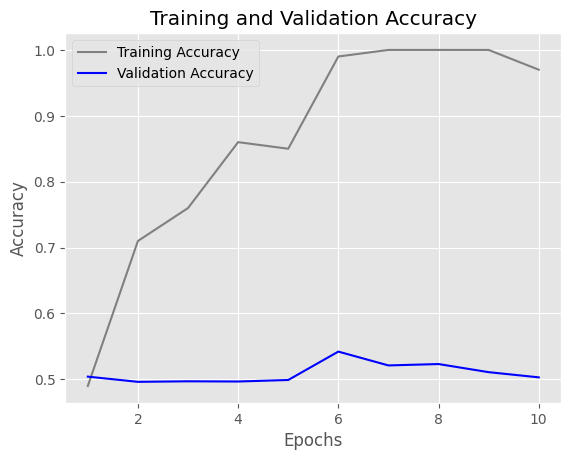

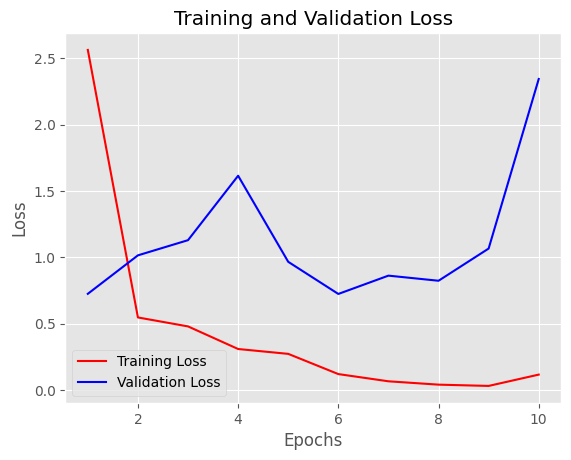

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.initializers import Constant
import matplotlib.pyplot as plt

# Define the model
glove_dense_model = Sequential()
glove_dense_model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=max_review_length
    )
)
glove_dense_model.add(Flatten())
glove_dense_model.add(Dense(32, activation='relu'))
glove_dense_model.add(Dense(1, activation='sigmoid'))

# Force the embedding layer to build its weights
glove_dense_model.layers[0].build(input_shape=(None, max_review_length))

# Set pretrained GloVe embeddings
glove_dense_model.layers[0].set_weights([embedding_weights])
glove_dense_model.layers[0].trainable = False

# Compile the model
glove_dense_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Fit the model
history_glove_dense = glove_dense_model.fit(
    x_train_set, y_train_set,
    epochs=10,
    batch_size=32,
    validation_data=(x_val_set, y_val_set)
)

# Save the model weights
glove_dense_model.save_weights('glove_dense_frozen.weights.h5')

# --- Plot Training & Validation Results ---

train_acc = history_glove_dense.history['acc']
val_acc = history_glove_dense.history['val_acc']
train_loss = history_glove_dense.history['loss']
val_loss = history_glove_dense.history['val_loss']
epoch_range = range(1, len(train_acc) + 1)

# Accuracy Plot
plt.plot(epoch_range, train_acc, 'grey', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Loss Plot
plt.plot(epoch_range, train_loss, 'red', label='Training Loss')
plt.plot(epoch_range, val_loss, 'blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [38]:
# Evaluate the GloVe-based dense model on the test set
final_test_loss, final_test_accuracy = glove_dense_model.evaluate(x_test, y_test)

# Print test performance
print("Test Loss:", round(final_test_loss, 4))
print("Test Accuracy:", round(final_test_accuracy, 4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5074 - loss: 2.3558
Test Loss: 2.395
Test Accuracy: 0.4998


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - acc: 0.4839 - loss: 1.9247 - val_acc: 0.4994 - val_loss: 0.6936
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.5559 - loss: 0.6955 - val_acc: 0.4982 - val_loss: 0.6933
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.6103 - loss: 0.6466 - val_acc: 0.4999 - val_loss: 1.0671
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7127 - loss: 0.5769 - val_acc: 0.4972 - val_loss: 1.0883
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7895 - loss: 0.5119 - val_acc: 0.4978 - val_loss: 0.8993
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8451 - loss: 0.3643 - val_acc: 0.5001 - val_loss: 0.9363
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9078 - loss: 0.2730 - val_acc: 0.4993 - val_loss: 0.8093
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9612 - loss: 0.1845 - val_acc: 0.5035 - val_loss: 0.9016
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9696

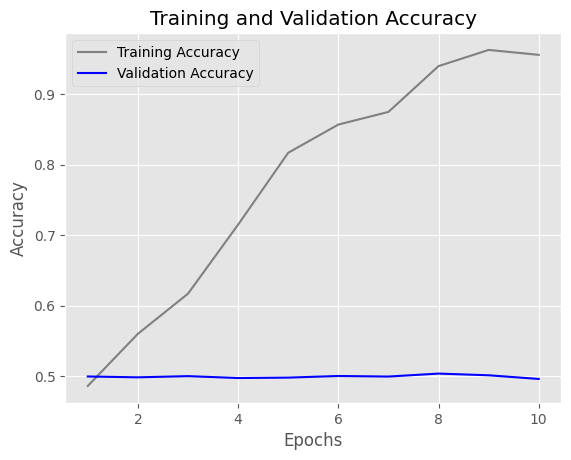

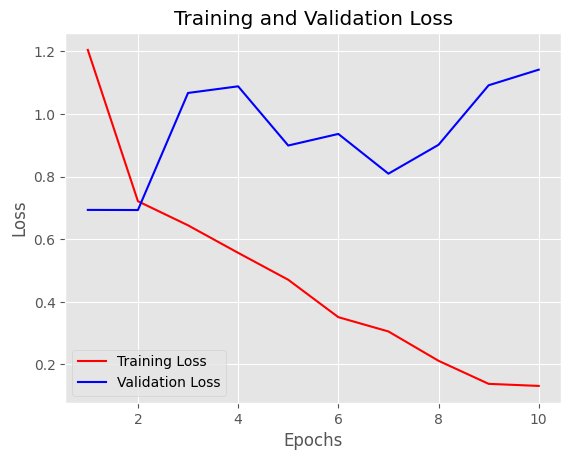

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Parameters
max_len = 150
train_samples = 1000
val_samples = 10000
vocab_limit = 10000
embedding_dim = 100

# Tokenization
tokenizer_glove = Tokenizer(num_words=vocab_limit)
tokenizer_glove.fit_on_texts(review_texts)
sequence_data = tokenizer_glove.texts_to_sequences(review_texts)
word_idx = tokenizer_glove.word_index
print("Found %s unique tokens." % len(word_idx))

# Padding
padded_data = pad_sequences(sequence_data, maxlen=max_len)
label_array = np.asarray(review_labels)
print("Shape of data tensor:", padded_data.shape)
print("Shape of label tensor:", label_array.shape)

# Shuffle and split
indices = np.arange(padded_data.shape[0])
np.random.shuffle(indices)
padded_data = padded_data[indices]
label_array = label_array[indices]

x_train_embed = padded_data[:train_samples]
y_train_embed = label_array[:train_samples]
x_val_embed = padded_data[train_samples:train_samples + val_samples]
y_val_embed = label_array[train_samples:train_samples + val_samples]

# Build embedding matrix
embedding_matrix_final = np.zeros((vocab_limit, embedding_dim))
for word, idx in word_idx.items():
    if idx < vocab_limit:
        vec = glove_embeddings.get(word)
        if vec is not None:
            embedding_matrix_final[idx] = vec

# Define the model
glove_flat_model = Sequential()
glove_flat_model.add(Embedding(input_dim=vocab_limit,
                               output_dim=embedding_dim,
                               input_length=max_len))
glove_flat_model.add(Flatten())
glove_flat_model.add(Dense(32, activation='relu'))
glove_flat_model.add(Dense(1, activation='sigmoid'))
glove_flat_model.summary()

# Build and set pretrained weights
glove_flat_model.layers[0].build(input_shape=(None, max_len))
glove_flat_model.layers[0].set_weights([embedding_matrix_final])
glove_flat_model.layers[0].trainable = False

# Compile the model
glove_flat_model.compile(optimizer='rmsprop',
                         loss='binary_crossentropy',
                         metrics=['acc'])

# Train the model
history_flat = glove_flat_model.fit(
    x_train_embed, y_train_embed,
    epochs=10,
    batch_size=32,
    validation_data=(x_val_embed, y_val_embed)
)

# Save weights
glove_flat_model.save_weights('glove_flat_model.weights.h5')

# --- Plot Training & Validation Metrics ---

train_acc = history_flat.history['acc']
val_acc = history_flat.history['val_acc']
train_loss = history_flat.history['loss']
val_loss = history_flat.history['val_loss']
epochs_range = range(1, len(train_acc) + 1)

# Accuracy Plot
plt.plot(epochs_range, train_acc, 'grey', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Loss Plot
plt.plot(epochs_range, train_loss, 'red', label='Training Loss')
plt.plot(epochs_range, val_loss, 'blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [40]:
# Evaluate the flattened GloVe-based model on the test data
test_loss_flat, test_accuracy_flat = glove_flat_model.evaluate(x_test, y_test)

# Print evaluation results
print("Test Loss:", round(test_loss_flat, 4))
print("Test Accuracy:", round(test_accuracy_flat, 4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.5055 - loss: 1.0947
Test Loss: 1.1099
Test Accuracy: 0.5003


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - acc: 0.5110 - loss: 1.4062 - val_acc: 0.4972 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.4936 - loss: 0.7065 - val_acc: 0.4975 - val_loss: 0.6948
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.5651 - loss: 0.7007 - val_acc: 0.5032 - val_loss: 0.7701
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.5732 - loss: 0.6761 - val_acc: 0.4957 - val_loss: 0.6957
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.6362 - loss: 0.6204 - val_acc: 0.4952 - val_loss: 0.7082
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7088 - loss: 0.5765 - val_acc: 0.5028 - val_loss: 0.8910
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.7676 - loss: 0.4953 - val_acc: 0.5001 - val_loss: 0.8567
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8295 - loss: 0.4323 - val_acc: 0.4942 - val_loss: 1.2452
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8769

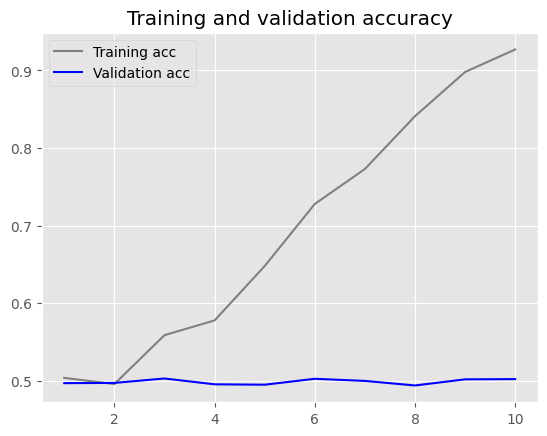

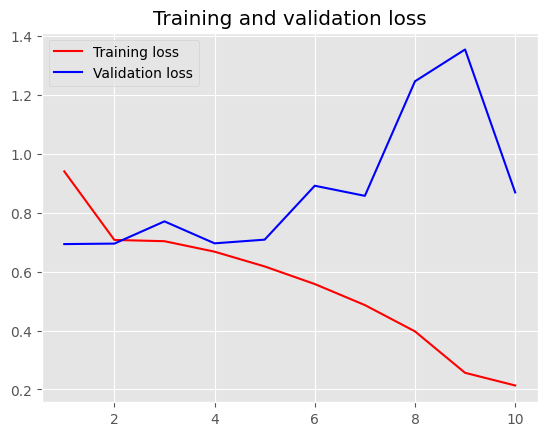

In [44]:
model13 = Sequential()
# Assuming 'vocab_size' from previous cells holds the total number of words
model13.add(Embedding(vocab_size, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

# Build and set the embedding matrix
model13.layers[0].build(input_shape=(None, length))
model13.layers[0].set_weights([embedding_matrix_final]) # Assuming this holds your pre-trained embeddings
model13.layers[0].trainable = False

# Compile the model
model13.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Train the model
history13 = model13.fit(
    x_train_embed, y_train_embed, # Use the data prepared for GloVe
    epochs=10,
    batch_size=32,
    validation_data=(x_val_embed, y_val_embed)
)

# Save weights
model13.save_weights('pre_trained_glove_model.weights.h5')

# ... (rest of the plotting code remains the same)
# Plot results
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
# Evaluate model13 on the test set
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)

# Print the evaluation results
print("Test Loss (Model 13):", round(test_loss13, 4))
print("Test Accuracy (Model 13):", round(test_accuracy13, 4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4978 - loss: 0.8602
Test Loss (Model 13): 0.8642
Test Accuracy (Model 13): 0.4942
